In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [11]:
df = pd.read_csv('train.csv')

In [12]:
# Extract the year and create a new column
df['ano'] = df['full_name'].str.extract(r'(\d{4})')

# Display the resulting DataFrame
print(df['ano'])

0        2019
1        2018
2        2015
3        2021
4        2019
         ... 
13951    2021
13952    2017
13953    2017
13954    2017
13955    2015
Name: ano, Length: 13956, dtype: object


In [13]:
# Extract the first word after the year and create a new column
df['marca'] = df['full_name'].str.extract(r'\d{4}\s(\w+)')

# Print the resulting DataFrame
print(df['marca'])


0           Tata
1          Honda
2          Honda
3           Tata
4         Maruti
          ...   
13951        Kia
13952    Hyundai
13953      Skoda
13954     Maruti
13955      Honda
Name: marca, Length: 13956, dtype: object


In [14]:
# Get everything that comes after "marca"
df['modelo'] = df['full_name'].str.extract(r'\d{4}\s\w+\s(.+)')

# Print the resulting DataFrame
print(df['modelo'])

0                                        Tiago XZ Plus
1                                       WR-V i-VTEC VX
2                                       City i VTEC SV
3        New Safari XZA Plus Adventure Edition AT BSVI
4                                  Baleno 1.2 CVT Zeta
                             ...                      
13951                                 Carnival Premium
13952                          i20 1.2 Magna Executive
13953                      Rapid 1.5 TDI Ambition BSIV
13954                                Vitara Brezza ZDi
13955                                  Amaze S i-Vtech
Name: modelo, Length: 13956, dtype: object


In [15]:
print(df['marca'].unique())

['Tata' 'Honda' 'Maruti' 'BMW' 'Hyundai' 'Volkswagen' 'Renault' 'Mercedes'
 'Mahindra' 'Ford' 'Toyota' 'MG' 'Jaguar' 'Datsun' 'Chevrolet' 'Kia'
 'Land' 'Nissan' 'Skoda' 'Mitsubishi' 'Volvo' 'Audi' 'Citroen' 'Jeep'
 'Force' 'Fiat' 'Lexus' 'Mini' 'Isuzu' 'OpelCorsa' 'Porsche' 'Bentley'
 'Hindustan' 'Daewoo']


In [16]:
brand_counts = df['marca'].value_counts()
print(brand_counts)


marca
Maruti        3890
Hyundai       2851
Honda         1422
Tata           791
Mahindra       633
Toyota         582
Renault        515
Ford           460
Volkswagen     443
Mercedes       399
BMW            307
Skoda          272
Kia            240
Audi           222
MG             152
Nissan         147
Jeep           135
Chevrolet      127
Datsun          81
Jaguar          72
Land            50
Fiat            49
Volvo           44
Mitsubishi      21
Mini            11
Porsche         11
Isuzu            9
Citroen          7
Force            4
Lexus            4
OpelCorsa        2
Bentley          1
Hindustan        1
Daewoo           1
Name: count, dtype: int64


In [19]:


# Sua coluna de marcas
marcas = df['marca']

# Número de documentos (ou entradas) no DataFrame
n_docs = len(df)

idf = {}

# Usando drop_duplicates para obter valores únicos
unique_marcas = marcas.drop_duplicates()

for marcas in unique_marcas:
    k = sum(marcas in df['marca'][i] for i in range(n_docs))  # contagem de documentos que contêm esta marca
    idf[marcas] = np.log10(n_docs / (k + 1))  # Adicionei +1 para evitar divisão por zero


for marcas, value in idf.items():
    print(f'{marcas:>15}: {value:>10}')

           Tata: 1.2460357791865797
          Honda: 0.9915560606917889
         Maruti: 0.5546997299723307
            BMW: 1.656210244275629
        Hyundai: 0.6896114395962453
     Volkswagen: 1.4973779906614535
        Renault: 1.4321112591488618
       Mercedes: 1.5427009694481109
       Mahindra: 1.3426717028943405
           Ford: 1.4810600353864252
         Toyota: 1.379092406017059
             MG: 1.9600695299584745
         Jaguar: 2.2814381006556173
         Datsun: 2.2309471083923564
      Chevrolet: 2.037550991128205
            Kia: 1.7627439182012048
           Land: 2.437190784678137
         Nissan: 1.9744992453811159
          Skoda: 1.7085983137353171
     Mitsubishi: 2.802338279953867
          Volvo: 2.4915484470007296
           Audi: 1.7964560977279125
        Citroen: 3.24167097378413
           Jeep: 2.0112220524058557
          Force: 3.4457909564400544
           Fiat: 2.4457909564400544
          Lexus: 3.4457909564400544
           Mini: 3.0655797147284485

In [20]:
#Create id_marca: IDF

marcas = df['marca']

# Número de entradas no DataFrame
n_docs = len(df)

idf = {}

# valores únicos
unique_marcas = marcas.drop_duplicates()

for marcas in unique_marcas:
    k = sum(marcas in df['marca'][i] for i in range(n_docs))  # contagem de 1 tipo de combustível
    idf[marcas] = np.log10(n_docs / (k + 1))  # evitar divisão por zero

# Criar nova coluna 'idf' no DataFrame
df['id_marcas'] = df['marca'].map(idf)

# Se desejar imprimir o DataFrame com a nova coluna
print(df)

                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953             2017 Skoda Rapid 1.5 TDI Ambition BSIV        Jan 2018   
13954                      2017 Maruti Vitara Brezza ZDi        Apr 2017   
13955                         2015 Honda Amaze S i-Vtech        Mar 2015   

      engine_capacity              insurance transmission_type  kms_driven  \
0        

In [21]:
# Change the data types of multiple columns
df = df.astype({
    
    'ano': int,
    'marca': 'string',
    'modelo': 'string',
    'id_marcas': float
    
})



In [22]:
# Check data types
data_types = df.dtypes
print("Data type by column:")
print(data_types)

Data type by column:
full_name                    object
registered_year              object
engine_capacity              object
insurance                    object
transmission_type            object
kms_driven                   object
owner_type                   object
fuel_type                    object
max_power                    object
seats                       float64
mileage                      object
body_type                    object
city                         object
resale_price_Lakh           float64
ano                           int32
marca                string[python]
modelo               string[python]
id_marcas                   float64
dtype: object


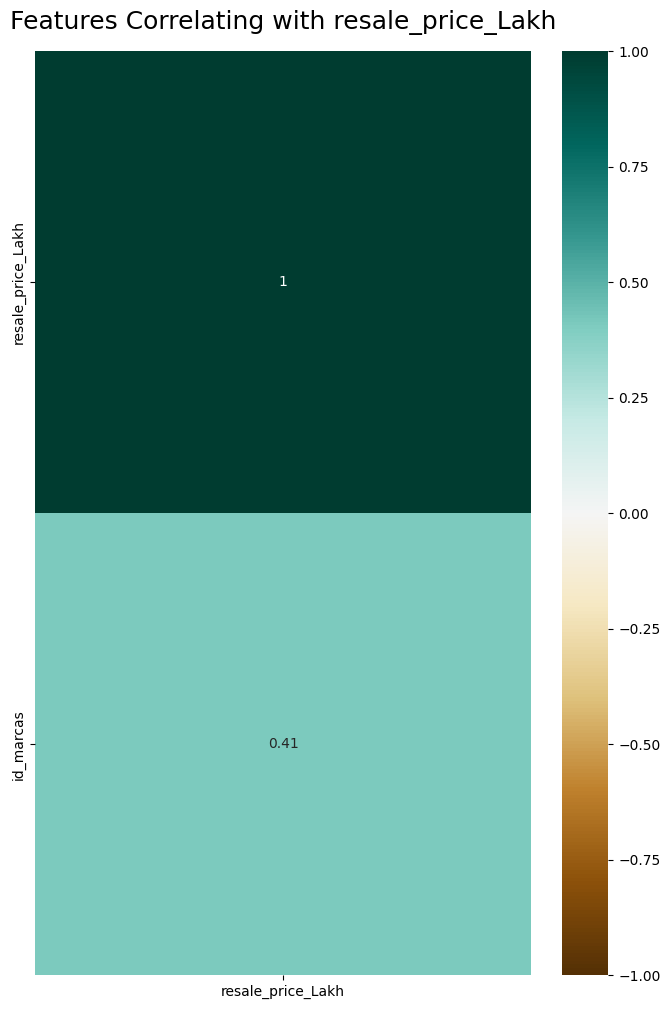

In [23]:
#correlation of all features with price

# Select columns
columns_of_interest = ['id_marcas', 'resale_price_Lakh']
subset_df = df[columns_of_interest]

plt.figure(figsize=(8, 12))

# Creat heatmap
heatmap = sns.heatmap(subset_df.corr()[['resale_price_Lakh']].sort_values(by='resale_price_Lakh', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with resale_price_Lakh', fontdict={'fontsize': 18}, pad=16)

plt.show()